In [4]:
import numpy as np
import pandas as pd
from pandas import read_csv
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import math

In [5]:
# Load data
data = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\Data_transform.csv", header = 0,  index_col=0, parse_dates=True, dayfirst=False)

# Select 3 exogenous variables 
data_new = data[['GDP', 'M1', 'M4','M5']]
data_new = data_new.dropna()
display(data_new)

# Split the data into training and testing sets
train_size = int(len(data_new) * 0.8)
train, test = data_new[:train_size], data_new[train_size:]

,GDP,M1,M4,M5
Date,,,,
1959-06-30,0.022301,0.012391,0.004168,7.332865
1959-09-30,0.000705,-0.019971,-0.001575,7.316347
1959-12-31,0.002845,0.019589,0.004622,7.281844
1960-03-31,0.022228,0.002654,0.001718,7.204208
1960-06-30,-0.005405,-0.007252,-0.000649,7.145892
...,...,...,...,...
2018-12-31,0.002229,-0.000848,0.001212,7.057013
2019-03-29,0.005960,-0.003236,0.000788,7.086399
2019-06-28,0.007898,-0.001557,0.001012,7.149682


In [23]:
# Define and fit the ARX model
order = (3, 0, 0)  # AR order = 1, I order = 0, MA order = 0
model = ARIMA(endog=train[['GDP']], exog=train.iloc[:, 1:], order=order)
results = model.fit(method='statespace')

c:\Users\zhouq\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\zhouq\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\zhouq\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)


In [24]:
# make first prediction
predictions = results.predict(start=len(train), end=len(data_new)-1, exog=test.iloc[:, 1:])

# Evaluate the model
mse = mean_squared_error(test['GDP'], predictions)
print('MSE: '+str(mse))

mae = mean_absolute_error(test['GDP'], predictions)
print('MAE: '+str(mae))

rmse = math.sqrt(mean_squared_error(test['GDP'], predictions))
print('RMSE: '+str(rmse))



MSE: 1.9115867482631436e-05
MAE: 0.003423806165669268
RMSE: 0.004372169653916855


In [22]:
rmsfe = np.sqrt(mse / len(test))* 1e4
print(f'RMSFE: {rmsfe}')

RMSFE: 6.296505423890947


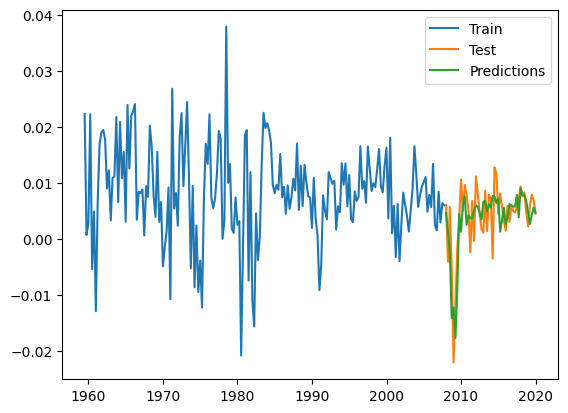

In [16]:
# Plot the actual vs. predicted values
plt.plot(data_new.index[:len(train)], train['GDP'], label='Train')
plt.plot(data_new.index[len(train):], test['GDP'], label='Test')
plt.plot(data_new.index[len(train):], predictions, label='Predictions')
plt.legend()
plt.show()